# DA-2

## NAME         : V.S.Sai Rashwant
## ROLL NO.  : 20BCE1332
## EMAIL        : sairashwant.vs2020@vitstudent.ac.in
## BRANCH    : VIT CHENNAI
## PHONE       : 6369438149

# DATA PREPROCESSING

## 1.BASIC DATA ANALYSIS AND REMOVING OUTLIERS

In [1]:
#importing nessasary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns

In [4]:
#we are storing data in variable so that we dont touch the original data
#it is an untold rule in data science that we should never touch the original data
#we can make the copy of the data and manuplate it
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
#getting the descriptive statistics of the data 
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [6]:
#checking the null values in each column
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
#getting data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: >

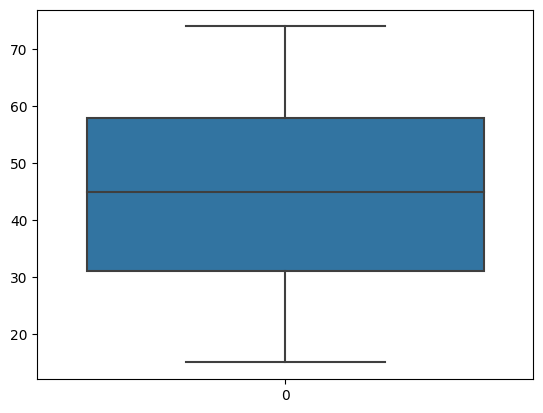

In [8]:
#checking for outliers using boxplot
sns.boxplot(df['Age'])

<Axes: >

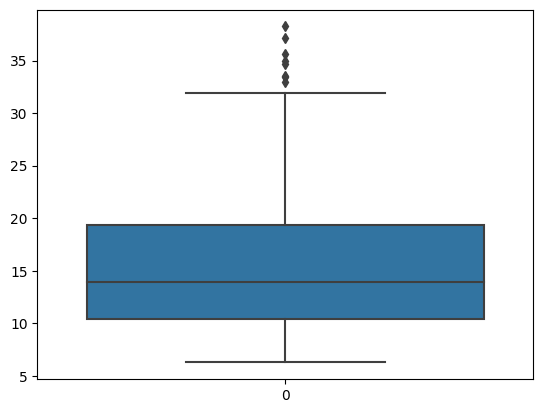

In [9]:
sns.boxplot(df['Na_to_K'])

From the above graphs we can observe that we have outliers in Na_to_K column. We are going to remove them using IQR(Inter Quartile Range) method

In [10]:
#chekcing shape of our data
df.shape

(200, 6)

<Axes: >

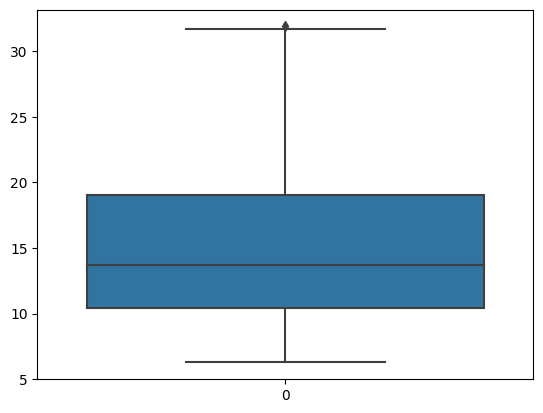

In [11]:
Q1 = df.Na_to_K.quantile(.25)
Q3 = df.Na_to_K.quantile(.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

#redefining bmi column
df = df[df.Na_to_K < upper_limit] # we can also replace values with median
df = df[df.Na_to_K > lower_limit] # we can also replace values with median
sns.boxplot(df.Na_to_K)

In [12]:
#chekcing shape of our data after IQR removal method
df.shape

(192, 6)

we have removed 8 rows having outliers

## 2.MULTI-VARIANT DATA ANALYSIS VISUALIZATION 

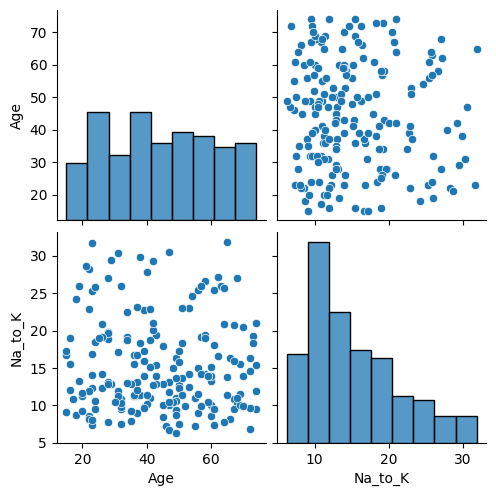

In [13]:
sns.pairplot(df)

<ipython-input-14-23750a91aa44>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

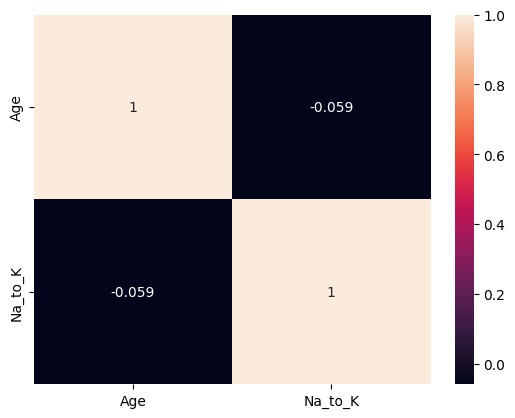

In [14]:
#heatmap graph/ correlation graph
sns.heatmap(df.corr(), annot=True)

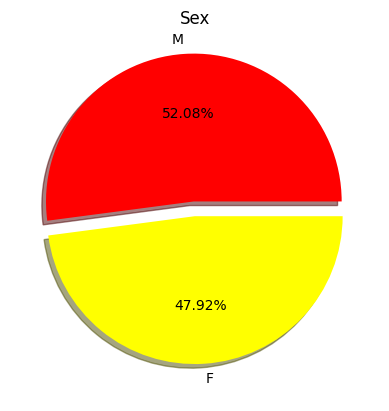

In [15]:
#Sex column visualization
#to plot catagorical columns we go for pie-chart using matplotlib
#to visualize data we use matplotlib and seaborn
import matplotlib.pyplot as plt
plt.pie(df.Sex.value_counts(), [0.1, 0], labels = ['M', 'F'], autopct='%1.2f%%', colors=['red', 'yellow'], 
        shadow=2)
plt.title("Sex")
plt.show()

<Axes: ylabel='Sex'>

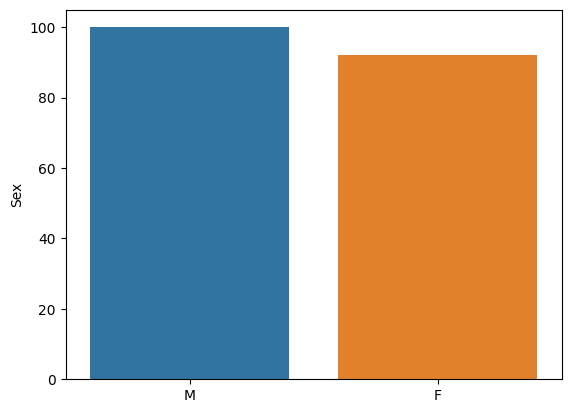

In [16]:
#bar plot sex
sns.barplot(x=df.Sex.value_counts().index, y=df.Sex.value_counts())

<Axes: ylabel='BP'>

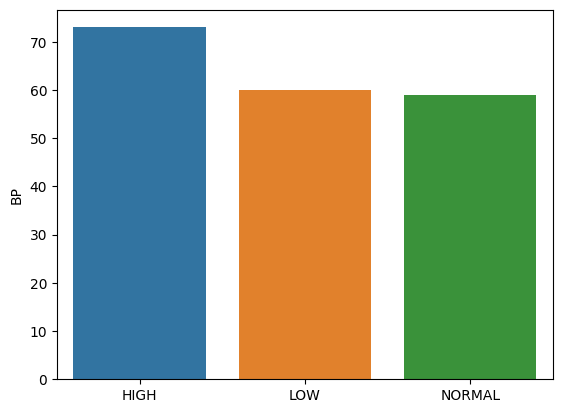

In [17]:
#bar plot BP
#df.BP.value_counts().index gives the corrosponding names
sns.barplot(x=df.BP.value_counts().index, y=df.BP.value_counts())

<Axes: ylabel='Cholesterol'>

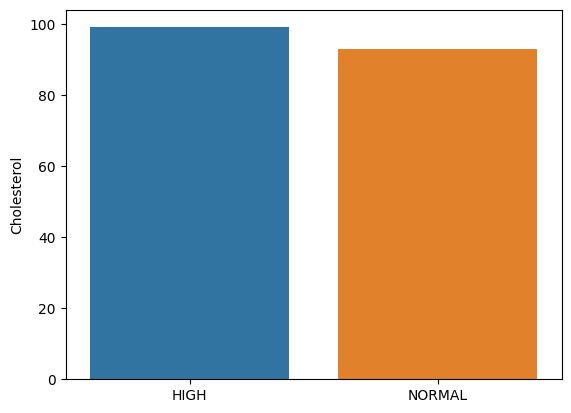

In [18]:
#bar plot Cholestrol
sns.barplot(x=df.Cholesterol.value_counts().index, y=df.Cholesterol.value_counts())

<Axes: ylabel='Drug'>

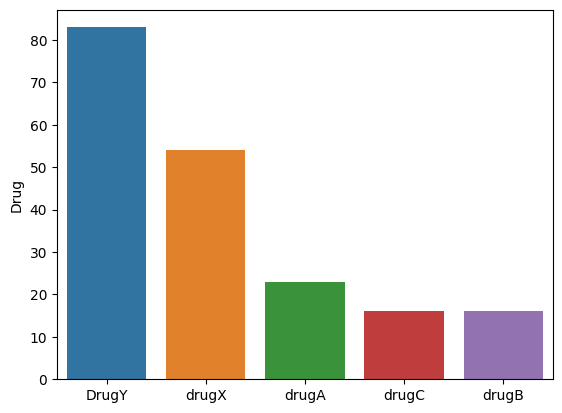

In [19]:
#bar plot Drug
sns.barplot(x=df.Drug.value_counts().index, y=df.Drug.value_counts())

## 3. SPLITTING DATA & ENCODING

step 1 : split dependent and independent data

 target variable is called dependent (in our case Drug), the rest are independent
dependent variable is most of the times will be one column. if their are more than 1 dependent targets. we 
have to take 1 target column. if we use more than 1 target columns we are going to get an error.
in a single model we cant combine two or more target varibales.
one model can predict only one target variable

In [20]:
#independent cols
x = df.iloc[:, 0:4]
#dependent cols
y = df['Drug']

In [21]:
x, y

(     Age Sex      BP Cholesterol
 0     23   F    HIGH        HIGH
 1     47   M     LOW        HIGH
 2     47   M     LOW        HIGH
 3     28   F  NORMAL        HIGH
 4     61   F     LOW        HIGH
 ..   ...  ..     ...         ...
 195   56   F     LOW        HIGH
 196   16   M     LOW        HIGH
 197   52   M  NORMAL        HIGH
 198   23   M  NORMAL      NORMAL
 199   40   F     LOW      NORMAL
 
 [192 rows x 4 columns],
 0      DrugY
 1      drugC
 2      drugC
 3      drugX
 4      DrugY
        ...  
 195    drugC
 196    drugC
 197    drugX
 198    drugX
 199    drugX
 Name: Drug, Length: 192, dtype: object)

step 2 : 
we split training and testing data so that we test the accuracy and speed of our model using testing data
if we are having 100 data we have to make sure training data is higher than testing data

In [22]:
#we can split data using model_selection module under sklearn library
from sklearn.model_selection import train_test_split

#we shuffle the data 12 times (random_state) & we take 20% of data as test data (test_size) remaining are training data.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 12)

#checking the dimentions of the train and test data
print(x.shape, y.shape, xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(192, 4) (192,) (153, 4) (39, 4) (153,) (39,)


step 3: encoding the splited data

if we have object datatype we cannot build a model as we need all integer or flot datatype for building.
This is because algorithms are mathamatical derivation. when it comes to a mathematical derivations if we give a text 
value we will be getting an error/random value. but we can give numerical data to give an answer.
so we have to convert object into integer or float. This process is called ENCODING. we have different types 
of encoding. some examples are manual encoding, label encoding, one hot encoding etc. these 3 are the popular incoding 
techneques

we are using label encoding for columns in xtrain, x test

In [23]:
'''Label encdoing for columns in x'''
#label encoder using sklearn library under preprocessing module
from sklearn.preprocessing import LabelEncoder

#initiliazing the library
le = LabelEncoder()

#when we are traing our model have to go for fit_transform
#here we transform the text value to numerical value
#in fit_transform, will train based on be trained using the string values. a pattern has been saved to the encoder,
#i..e.. the string value and its corrosponding numeric value will be stored when using fir_transform
xtrain['Sex'] = le.fit_transform(xtrain['Sex'])
#for test data we can use tranfrom which dose not save the string, numeric value pair internally
xtest['Sex'] = le.transform(xtest['Sex'])

xtrain['BP'] = le.fit_transform(xtrain['BP'])
xtest['BP'] = le.transform(xtest['BP'])

xtrain['Cholesterol'] = le.fit_transform(xtrain['Cholesterol'])
xtest['Cholesterol'] = le.transform(xtest['Cholesterol'])

we are using hot encoding for columns in ytrain, ytest

In [24]:
'''one hot encdoing for columns in y'''
ytrain = pd.get_dummies(ytrain.iloc[:,]).values 

In [25]:
ytrain

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0,

In [26]:
ytest = pd.get_dummies(ytest.iloc[:,]).values 

In [27]:
ytest

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [28]:
xtrain

,Age,Sex,BP,Cholesterol
42,50,1,2,1
25,28,0,0,1
8,60,1,2,0
41,58,0,0,1
164,16,1,0,1
...,...,...,...,...
3,28,0,2,0
135,74,1,1,1
139,69,0,2,0
160,30,0,2,0


In [29]:
xtest

,Age,Sex,BP,Cholesterol
63,45,1,1,1
11,34,0,0,1
178,39,1,2,0
87,69,1,1,0
150,49,1,0,1
95,36,1,1,1
21,63,1,2,0
67,17,1,2,1
23,48,0,1,0
62,67,1,1,1


# BUILDING MODEL

Building a skleton model

In [30]:
##we import the required libraries

#sequential helps us to sequentially for back, forward popagation
from tensorflow.keras.models import Sequential
#getting layers 
from tensorflow.keras.layers import Dense

#initializing our regression model with sequential
reg_model = Sequential()

#now we add our inputs, using activation function as relu. we give 4 as we have 4 input columns
reg_model.add(Dense(4, activation='relu'))

#now we give the the 1st hidden layer to the model 
#you can give any number of neurons
reg_model.add(Dense(420, activation='relu'))

#now we give the the 2nd hidden layer to the model 
#you can give any number of neurons
reg_model.add(Dense(690, activation='relu'))

#now we give the the 3rd hidden layer to the model 
#you can give any number of neurons
reg_model.add(Dense(420, activation='relu'))

#now we give the the output layer. we have 3 types of values for output. so we use 3 neurons in output layers
#for multiclass clasification we give softmax, bianary classification we use sigmoid
reg_model.add(Dense(5, activation='softmax'))

 now we compile our skeleton model with our loss and gradient decent

In [31]:
#when we are using classification types of problems we use loss function as categorical_crossentropy
#metrices=['accuracy'] gives us accuracy of model
reg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

now we train the model

In [32]:
#batch size = 4 means that the training data will be divided into batches each containing 4 data and trained
# 1 epochs means 1 cycle of forward and backward propagation . epoch = 30 means for training 1 data we have 30 cycles

In [33]:
reg_model.fit(xtrain, ytrain, batch_size = 4, epochs= 795)

Epoch 1/795
39/39 [==============================] - 2s 9ms/step - loss: 1.9635 - accuracy: 0.2810
Epoch 2/795
39/39 [==============================] - 0s 9ms/step - loss: 1.5481 - accuracy: 0.3268
Epoch 3/795
39/39 [==============================] - 0s 11ms/step - loss: 1.4870 - accuracy: 0.3529
Epoch 4/795
39/39 [==============================] - 1s 14ms/step - loss: 1.4996 - accuracy: 0.4248
Epoch 5/795
39/39 [==============================] - 1s 14ms/step - loss: 1.4716 - accuracy: 0.4118
Epoch 6/795
39/39 [==============================] - 1s 14ms/step - loss: 1.4696 - accuracy: 0.3922
Epoch 7/795
39/39 [==============================] - 1s 14ms/step - loss: 1.4538 - accuracy: 0.4248
Epoch 8/795
39/39 [==============================] - 0s 12ms/step - loss: 1.4612 - accuracy: 0.4118
Epoch 9/795
39/39 [==============================] - 0s 9ms/step - loss: 1.4552 - accuracy: 0.4248
Epoch 10/795
39/39 [==============================] - 0s 9ms/step - loss: 1.4479 - accuracy: 0.4248
Epo

We are getting accuracy of about 70% - 80% which is good

# TESTING MODEL WITH RANDOM DATA

In [34]:
#we can get prediction for our own random data
reg_model.predict([[39, 1, 2, 0]])

1/1 [==============================] - 0s 131ms/step


array([[6.8894899e-01, 2.7047899e-02, 1.0279840e-09, 2.6542687e-01,
        1.8576188e-02]], dtype=float32)

In [35]:
#predicting data with our test data
reg_model.predict(xtest)

2/2 [==============================] - 0s 7ms/step


array([[5.32681942e-01, 9.75346118e-02, 1.26227181e-10, 4.74646315e-03,
        3.65036905e-01],
       [4.54803020e-01, 9.72636342e-02, 6.07214612e-10, 9.68367308e-02,
        3.51096600e-01],
       [6.88948989e-01, 2.70478986e-02, 1.02798403e-09, 2.65426934e-01,
        1.85761917e-02],
       [3.47921789e-01, 3.15632555e-04, 3.77703100e-01, 9.79570970e-02,
        1.76102310e-01],
       [3.48902792e-01, 2.78061539e-01, 3.93659510e-02, 1.01621024e-01,
        2.32048646e-01],
       [4.30842161e-01, 7.46002421e-02, 4.34540043e-10, 6.04470354e-03,
        4.88512844e-01],
       [3.74095351e-01, 2.91220546e-01, 1.73597003e-03, 9.97036099e-02,
        2.33244494e-01],
       [3.87336104e-03, 1.78490171e-15, 9.10703157e-17, 1.43600586e-13,
        9.96126592e-01],
       [3.57441545e-01, 2.65294135e-01, 2.63077418e-05, 1.60710603e-01,
        2.16527447e-01],
       [3.68795931e-01, 1.78412546e-03, 3.15765679e-01, 1.10200956e-01,
        2.03453258e-01],
       [3.70026171e-01, 2.9421